### Grupos

1. 
2. 
3.
4.
5.
6.
7.

### Atividades

1. Ler as bases de preços diários
2. Calcular retornos relativos diários (HP=1)
3. Calcular retorno médio e desvio padrão de cada ativo
4. Calcular matriz de covariância dos ativos
5. Plotar os ativos num gráfico de dispersão: retorno x risco
6. Definir pesos para os ativos e compor em uma carteira. Calcular o retorno e o risco desta carteira
7. Simular diversos conjuntos de pesos aleatoriamente e plotar no gráfico de dispersão estas carteiras

### Dicas

1. Defina funções para ler as bases ao invés de repetir os códigos.
2. Utilize as funções do Pandas - .mean(), .cov(), .shift(), etc.
3. Verifique os resultados a cada cálculo.
4. Para multiplicação matricial, utilize: np.dot()
5. Para simular valores aleatórios, utilize: np.ramdon.ramdon()

In [41]:
# Bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.optimize as solver

In [42]:
# Ler e tratar as bases
def read_infoMoney(file_name):
    df = pd.read_csv(file_name, sep=',', thousands='.', decimal=',')
    df = df[['DATA', 'FECHAMENTO']]
    df = df.set_index('DATA')
    
    return df



In [44]:
# Dicionário de ativos
assets = {'IBOV':  'Ibovespa (IBOV) - Histórico  InfoMoney.csv',
          'PETR4': 'Petrobras PETR4 - Histórico  InfoMoney.csv',
          'MRFG3': 'Marfrig MRFG3 - Histórico  InfoMoney.csv',
          'MGLU3': 'Magazine Luiza MGLU3 - Histórico  InfoMoney.csv',
          'BBAS3': 'Banco do Brasil BBAS3 - Histórico  InfoMoney.csv',
          'BBDC3': 'Bradesco BBDC3 - Histórico  InfoMoney.csv',
          'ITUB3': 'Itaú Unibanco ITUB3 - Histórico  InfoMoney.csv',
          'VALE3': 'Vale S.A. VALE3 - Histórico  InfoMoney.csv'}


In [45]:
# Consolidando os dados em um único DF
df_assets = pd.DataFrame()
for i in assets:
    df_assets[i] = read_infoMoney(assets[i])['FECHAMENTO']


In [37]:
df_assets

""


In [85]:
def calc_return(df, hp):
    df_returns = df / df.shift(-hp) - 1
    df_returns = df_returns.dropna()
    
    return df_returns
    
df_returns = calc_return(df_assets, 1)



In [86]:
# Cálculo da correlação entre os ativos
correl_matrix = df_returns.corr()

cov_matrix = df_returns.cov()

# Cálculo do retorno e desvio padrão dos ativos
mi = df_returns.mean() # média
sigma = df_returns.std() # desvio padrão



# nossa solução 
# Cálculo do retorno e desvio padrão dos ativos
mi =  # média
sigma =  # desvio padrão

lista_media = list()
for i in assets:
    df_assets[i].mean()
    lista_media.append
    
print(lista_media)


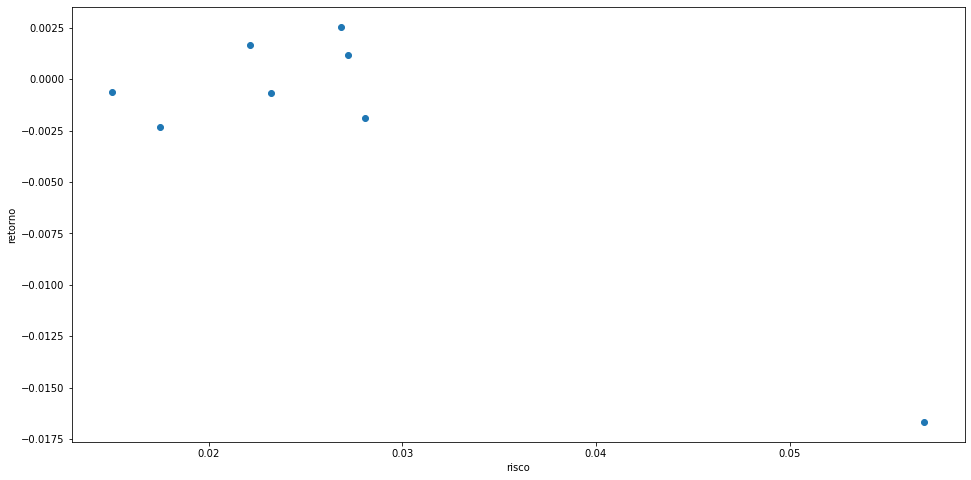

In [87]:
## Nossa solução
# Gráfico dos ativos: retorno x risco

plt.figure(figsize = (16,8))

plt.scatter(sigma, mi)

plt.xlabel("risco")
plt.ylabel("retorno")
plt.show()

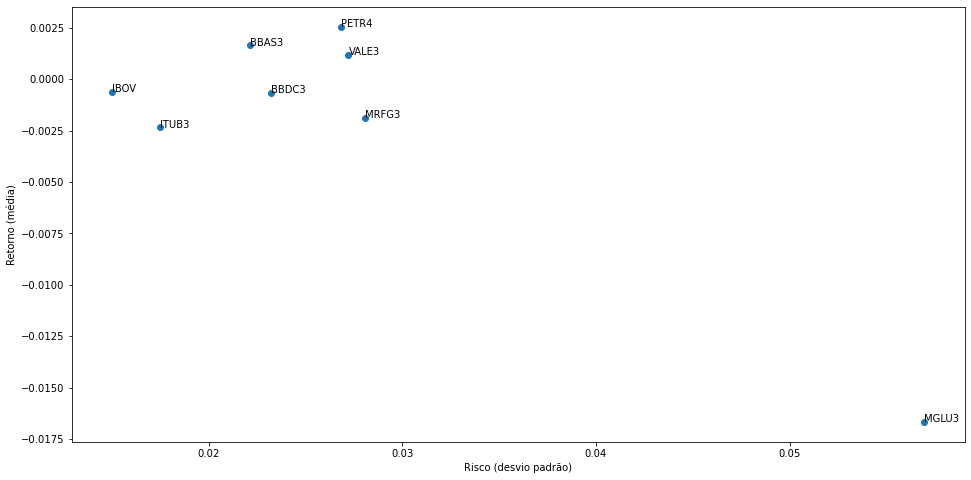

In [88]:
# Gráfico dos ativos: retorno x risco
plt.figure(figsize = (16,8))
plt.scatter(sigma, mi) # eixo x: risco; eixo y: retorno
plt.xlabel("Risco (desvio padrão)")
plt.ylabel("Retorno (média)")
for i, name in enumerate(mi.index.values): # atribuindo nomes aos pontos
    plt.annotate(name, (sigma[i], mi[i]))
plt.show()


# Nossa solução
# Compondo uma carteira 
w1 = 0.1
w2 = 0.1
w3 = 0.1
w4 = 0.1
w5 = 0.1
w6 = 0.1
w7 = 0.1
w8 = 0.3

retorno = mi[0]*w1 + mi[1]*w2 + mi[2]*w3 + mi[3]*w4 + mi[4]*w5 + mi[5]*w6 + mi[6]*w7 + mi[7]*w8

print ( 'retorno', retorno)

sigma_P = np.sqrt(W_A*2 * sigma_A2 + W_B2 * sigma_B2 + W_C2 * sigma_C*2 + 2*W_A*W_B*cov_AB + 2*W_A*W_C*cov_AC  + 2*W_B*W_C*cov_BC)


In [89]:
# Compondo uma carteira 
# Defino pesos iguais # pode mudar, desde que a soma dos pesos seja = 1
w = np.array([1/len(mi)]* len(mi))
w

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [90]:
# Cálculo de retorno e risco da carteira
mi_P = np.sum(w*mi)

mi_P

-0.002104827942313361

In [91]:
sigma_P = np.sqrt(np.dot(w, np.dot(cov_matrix, w)))

print(f'Retorno esperado: {round(mi_P*100, 4)}%, risco: {round(sigma_P*100, 4)}%')
   

Retorno esperado: -0.2105%, risco: 1.6406%


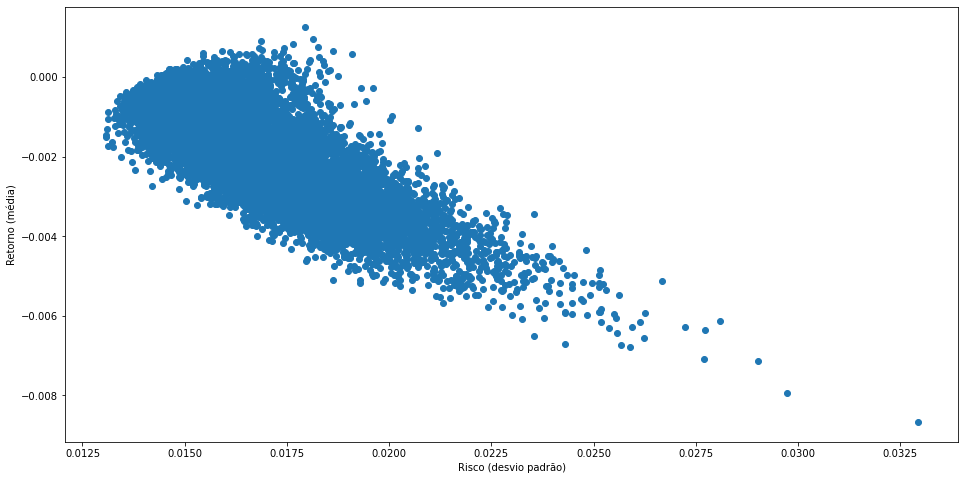

In [92]:
# Simulando carteiras com pesos diferentes
n = len(mi)

mi_sim = []
sigma_sim = []

for i in range(10000):
    
    # Simulando pesos
    w = np.random.random(n)
    w = w/np.sum(w) #  Normalizo para somar 1
    
    # Cálculo de risco e retorno
    mi_sim.append( np.sum(w*mi) )
    sigma_sim.append( np.sqrt(np.dot(w, np.dot(cov_matrix, w))) )
    
# Gráfico
plt.figure(figsize = (16,8))
plt.scatter(sigma_sim, mi_sim) # eixo x: risco; eixo y: retorno
plt.xlabel("Risco (desvio padrão)")
plt.ylabel("Retorno (média)")

plt.show()  





## Otimização de portfólio

Todo processo de otimização necessita da elaboração de uma função objetiva e da definição de um conjunto de restrições (se houver). Por exemplo, podemos minimizar uma função custo ou maximizar uma função de lucro. No nosso caso, utilizando a teoria de portfólio de Markowitz, desejamos uma das duas coisas:
- minimizar a volatilidade da carteira ou
- maximizar os retornos esperados

Analisaremos adiante cada um dos casos.

### Minimizar a volatilidade

Neste caso, desejamos obter um conjunto de pesos para os ativos da análise, tais que o risco da carteira ponderada por estes pesos seja o menor possível. Podemos escrever este objetivo da seguinte forma:

$$ min F(w) = \sqrt{\sum_{i=1}^N \sum_{j=1}^N W_i \cdot W_j \cdot COV_{i,j}} $$

Contudo, devemos considerar nossas restrições. A primeira delas refere-se aos valores dos pesos. Por definição, estes devem sempre somar 1. Portanto:

$$\sum_{i=1}^N W_i = 1 $$

ou

$$\sum_{i=1}^N W_i - 1 = 0 $$

A segunda restrição refere-se ao retorno desejado para a carteira, $\mu$. Para que este objetivo seja alcançado, podemos definir:

$$\sum_{i=1}^N W_i r_i = \mu $$

ou

$$\sum_{i=1}^N W_i r_i - \mu = 0 $$

Por fim, precisamos que os pesos possuam valores positivos e sejam menores que 100\%:

$$ w_i >= 0, \forall i=1,...,n $$
$$ w_i <= 1, \forall i=1,...,n $$

O que o cálculo numérico realiza é uma busca para encontrar o melhor conjunto de pesos para cada ativo que garanta que as restrições são respeitadas e que se tenha o menor risco possível.

---

Biblioteca Python utilizada para otimização:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

---


In [ ]:
# Definindo função objetivo
def f_obj_min_risk(w):
    return np.sqrt(np.dot(w, np.dot(cov_matrix, w)))

# Definindo valor inicial
w_ini = np.array([1/len(mi)]* len(mi)) 

In [ ]:
# Definindo o retorno desejado
ret = 0.004

# Definindo restrições
constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}, # primeira restrição
               {'type': 'eq', 'fun': lambda x: sum(x*mi) - ret}] # segunda restrição

# Definindo limites para os pesos
bounds = tuple((0, 1) for x in range(len(w))) 

In [ ]:
result = solver.minimize(f_obj_min_risk, w_ini, constraints=constraints, bounds=bounds, 
                         method='SLSQP')
result

In [ ]:
pesos = [round(w*100, 2) for w in result.x]
print(f'Pesos (%): {pesos}\nRisco portfólio (%): {round(result.fun*100,2)}')

In [ ]:
# Simulando para diversos retornos (buscando a fronteira eficiente)
ret_range = np.arange(0.0, 0.008, 0.0001)
sigma_sim = []

for ret in ret_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}, # primeira restrição
                   {'type': 'eq', 'fun': lambda x: sum(x*mi) - ret}] # segunda restrição
    
    result = solver.minimize(f_obj_min_risk, w_ini, constraints=constraints, bounds=bounds, 
                         method='SLSQP')
    sigma_sim.append(result.fun)
    
plt.plot(sigma_sim, ret_range, '--')

### Maximizar o retorno
Neste caso, fixamos a volatilidade desejada $\sigma_P$ e definimos a função objetivo para ampliar os retornos calculados a partir dos pesos. O problema de otimização pode ser rezumido por:

$$ max F(w) = \sum_{i=1}^N W_i r_i $$

Sujeito a:

$$\sqrt{\sum_{i=1}^N \sum_{j=1}^N W_i \cdot W_j \cdot COV_{i,j}} = \sigma_P $$
$$\sum_{i=1}^N W_i - 1 = 0 $$
$$ w_i >= 0, \forall i=1,...,n $$
$$ w_i <= 1, \forall i=1,...,n $$

Nas bibliotecas existentes, os problemas de otimização sempre são descritas como minimização. Mas isto não é um problema, pois podemos simplesmente inverter o sinal da função objetivo:

$$ min F(w) = - \sum_{i=1}^N W_i r_i $$

In [ ]:
# Definindo função objetivo

# Definindo valor inicial

# Definindo o retorno desejado

# Definindo restrições

# Definindo limites para os pesos


In [ ]:
# Imprime resultado


In [ ]:
# Simulando para diversos riscos (buscando a fronteira eficiente)


In [ ]:
# Gráfico 
